## 1. Collecting BRIC Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_palette('summer')
plt.style.use('seaborn')

In [2]:
nsei = pd.read_csv('data/BRICS EQUITY INDICES/NSEI.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
bvsp = pd.read_csv('data/BRICS EQUITY INDICES/BVSP.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
moex = pd.read_csv('data/BRICS EQUITY INDICES/MOEX.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
sse = pd.read_csv('data/BRICS EQUITY INDICES/SSE.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']

# creating a portfolio of stock returns from the major indices in the BRIC stock markets
dat = pd.DataFrame(
    {
        'BRAZIL (BVSP)':bvsp,
        'RUSSIA (MOEX)':moex,
        'INDIA (NIFTY)':nsei,
        'CHINA (SSE)':sse
    }
)

dat = dat.dropna()

In [3]:
dat.describe()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
count,1742.000000,1742.000000,1742.000000,1742.000000
mean,71224.398393,78.015811,9272.196132,2950.558053
std,22228.203337,32.894386,2131.697602,547.594220
min,37645.000000,26.796057,5285.000000,1950.011963
25%,52377.250000,45.863086,7860.150146,2607.305054
50%,63706.500000,82.384152,8898.649903,3005.104004
75%,88491.000000,94.174501,10856.400146,3274.184021
max,125077.000000,177.470001,15245.599609,5131.880859


In [4]:
# create a return dataframe from price data considering percentage change as returns
returns = dat.pct_change().dropna()['2014':'2018']

In [5]:
returns.head()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
Date,,,,
2014-01-06,-0.010348,-0.032000,-0.015840,-0.024705
2014-01-08,-0.007788,0.033058,-0.002722,-0.000669
2014-01-09,-0.024814,0.001077,-0.001012,-0.008178
2014-01-10,0.007583,0.003535,0.000503,-0.007064
2014-01-13,-0.005413,-0.001532,0.016414,-0.001855


In [6]:
returns.describe()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.000626,0.000685,0.000551,0.000294
std,0.016047,0.020557,0.009157,0.016231
min,-0.087992,-0.091292,-0.059151,-0.102663
25%,-0.008522,-0.010873,-0.004124,-0.005304
50%,0.000331,0.000000,0.000724,0.000678
75%,0.009520,0.012460,0.005867,0.006531
max,0.089838,0.132525,0.053214,0.105672


In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [8]:
def stationarity(df):
    import statsmodels.api as sm
    acf_p=acf(df, nlags=10)
    pacf_p=pacf(df, nlags=10)
    f, ax = plt.subplots(2, 2, sharey=True, figsize=(17,6))
    ax[0,0].plot(df)
    ax[0,0].set_title('Sharing Y axis')
    
    ax[0,1].plot(acf_p)
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[0,1].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')            
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].set_title(str('ACF plot'))
    
    ax[1,0].plot(pacf_p)
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[1,0].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')            
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].set_title(str('PACF plot'))
    

    sm.qqplot(df, line='s', ax=ax[1,1])
    ax[1,1].set_title(str('QQ plot'))
    
    rs=adfuller(df)
    print (rs)
    plt.savefig(f'images/{i}.png')
    plt.show()

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-24.902349841234958, 0.0, 1, 1071, {'1%': -3.436470487817901, '5%': -2.8642424166404, '10%': -2.5682088634756735}, -5686.847334963476)


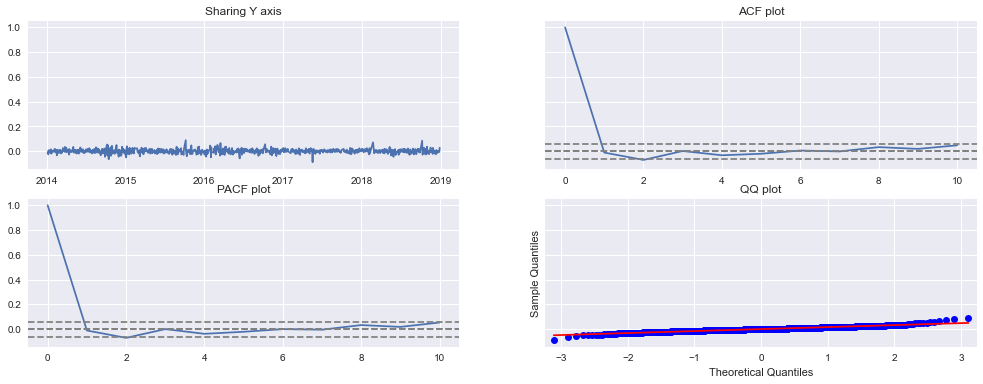

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-21.432380833633715, 0.0, 2, 1070, {'1%': -3.4364762217105844, '5%': -2.8642449457774135, '10%': -2.5682102104987337}, -5178.251987403245)


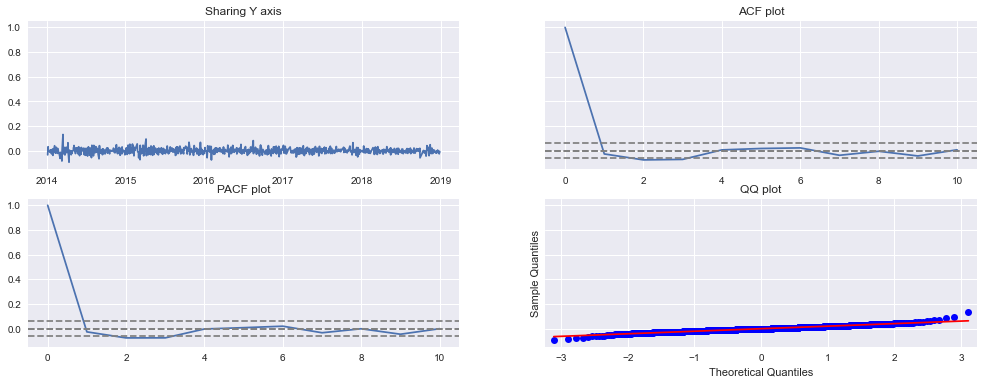

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-30.62396756907767, 0.0, 0, 1072, {'1%': -3.4364647646486093, '5%': -2.864239892228526, '10%': -2.5682075189699822}, -6875.872156124126)


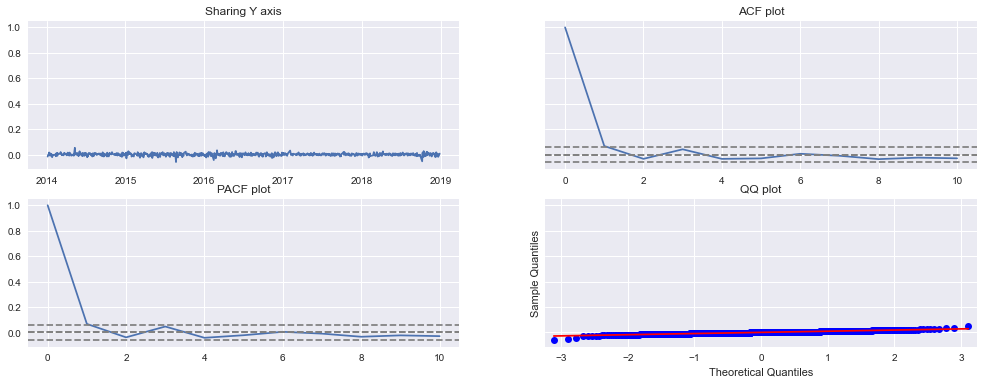

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
(-10.386085706187611, 2.078317984379741e-18, 7, 1065, {'1%': -3.4365050530846846, '5%': -2.864257662806096, '10%': -2.568216983623179}, -5663.465703559393)


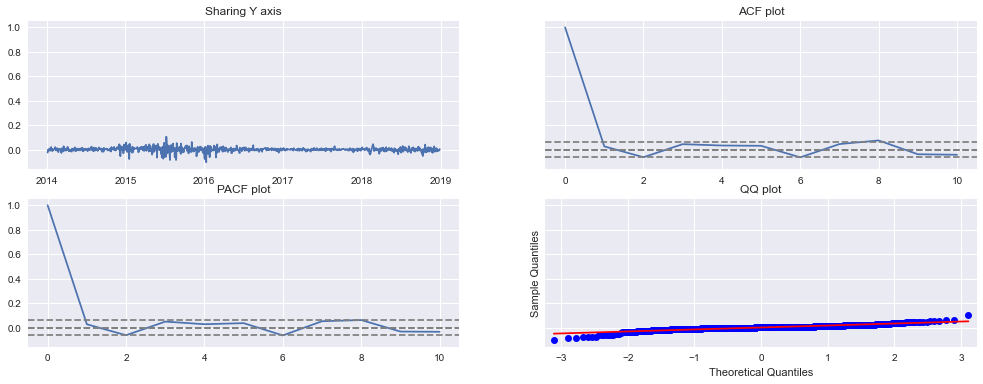

In [9]:
for i in returns.columns:
    stationarity(returns[i])

### I. Estimate an AR(1)-EGARCH(1,1) model for each asset 𝑖, and obtain parameter estimates, conditional sigmas and residuals

{Xt} is called an autoregressive process of order k with an GARCH noise of order p, q, in short

AR(k)-EGARCH(p,q) process, 

if for t = 0, ±1, ±, 2, . . . :

>$$Xt = ϕ_1X_{t−1} + · · · + ϕ_kX_{t−k} + ε_t$$

>$$ε_t = σ_tv_t$$

where $v_t$ is a strong white noise (iid (0,1)), and $σ_t$ satisfies the recurrence equation:

>$$ ln(σ_t^2) = \alpha_0 + \alpha_1 g({v_{t-1}}) + . . . . \alpha_p g({v_{t-p}}) + \beta_1 ln({\sigma_{t-1}} ^2) + . . . . \beta_q ln({\sigma_{t-q}} ^2)$$

where 

>$$g(v_t) = \theta v_t + \delta (|v_t| - E|v_t|)$$

Here, we are following the AR(1)-EGARCH(1,1)

Hence, our process is:

>$$Xt = ϕ_1X_{t−1} + ε_t$$

>$$ε_t = σ_tv_t$$

>$$ ln(σ_t^2) = \alpha_0 + \alpha_1 g({v_{t-1}}) + \beta_1 ln({\sigma_{t-1}} ^2) $$

>$$g(v_t) = \theta v_t + \delta (|v_t| - E|v_t|)$$


In [10]:
import armagarch as ag


# define mean, vol and distribution
meanMdl = ag.ARMA(order = {'AR':1,'MA':0})
volMdl = ag.garch(order = {'p':1,'q':1}) # need doubts clarified regarding E-GARCH
distMdl = ag.normalDist()

for i in returns.columns:
    # create a model
    model = ag.empModel(returns[i].to_frame(), meanMdl, volMdl, distMdl)

    # fit model
    model.fit()

    # get the conditional mean
    Ey = model.Ey

    # get conditional variance
    ht = model.ht
    cvol = np.sqrt(ht)

    # get standardized residuals
    stres = model.stres

    # make a prediction of mean and variance over next 3 days.
    pred = model.predict(nsteps = 1)


                         ARMA-GARCH estimation results                          
Dep Variable:           BRAZIL (BVSP)    R-squared:                        0.0
Mean Model:                      ARMA    Adj. R-squared:                  -0.0
Vol Model:                      GARCH    Log Likelihood:               2139.91
Distribution:                Gaussian    AIC:                         -4269.83
Method:                            ML    BIC:                         -4244.93
                                         Num obs:                         1073
Date:                Wed, Apr 07 2021    Df Residuals:                    1069
Time:                        18:40:58    Df Model:                           4
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

### II. Calculating Standardized residuals and conditional volatility

In [11]:
from arch import arch_model
res = []

In [12]:
for i in returns.columns: 
    m = arch_model(returns[i], vol= "EGARCH", p=1, o=0, q=1, dist='t', rescale = False)
    res.append((i, m.fit(update_freq=10)))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2986.9712240522526
            Iterations: 9
            Function evaluations: 75
            Gradient evaluations: 9
Iteration:     10,   Func. Count:     80,   Neg. LLF: -2695.2403009089267
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2695.2403009089257
            Iterations: 10
            Function evaluations: 80
            Gradient evaluations: 10
Iteration:     10,   Func. Count:     97,   Neg. LLF: 2853563.018319578
Iteration:     20,   Func. Count:    178,   Neg. LLF: 348254.91148290876
Iteration:     30,   Func. Count:    263,   Neg. LLF: 8413.837544722453
Iteration:     40,   Func. Count:    328,   Neg. LLF: 7576.92025248004
Iteration:     50,   Func. Count:    417,   Neg. LLF: 6384.470082570762
Iteration:     60,   Func. Count:    489,   Neg. LLF: 4210.420965326572
Iteration:     70,   Func. Count:    556,   Neg. LLF: 4208.431558382058
It

In [13]:
res

[('BRAZIL (BVSP)',
                          Constant Mean - EGARCH Model Results                        
  Dep. Variable:                BRAZIL (BVSP)   R-squared:                      -0.000
  Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
  Vol Model:                           EGARCH   Log-Likelihood:                2986.97
  Distribution:      Standardized Student's t   AIC:                          -5963.94
  Method:                  Maximum Likelihood   BIC:                          -5939.05
                                                No. Observations:                 1073
  Date:                      Wed, Apr 07 2021   Df Residuals:                     1068
  Time:                              18:41:04   Df Model:                            5
                                    Mean Model                                 
                   coef    std err          t      P>|t|       95.0% Conf. Int.
  ------------------------------------

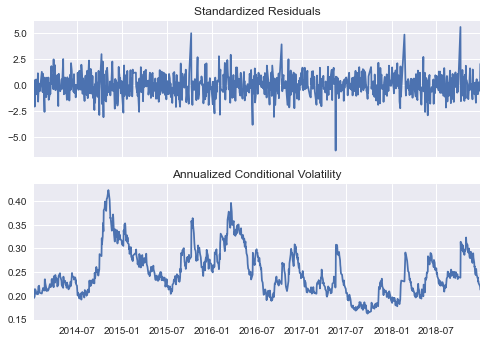

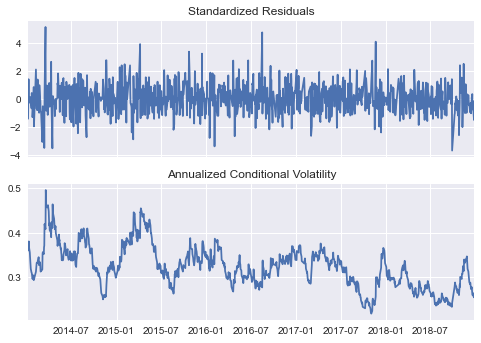

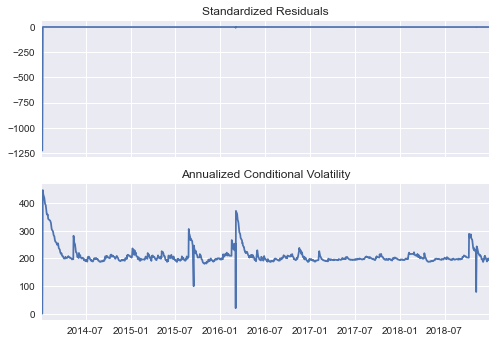

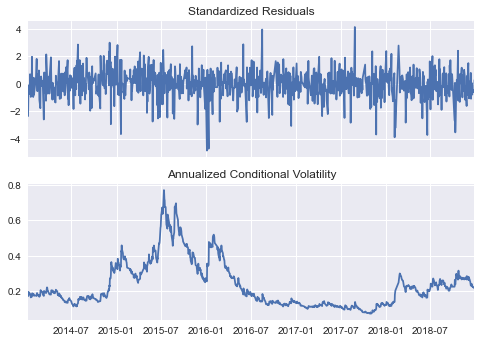

In [14]:
for i in range(4):
    fig = res[i][1].plot(annualize="D")
    fig.savefig(f'images/resid_{res[i][0]}.png')

### III. Fit univariate skewed-t distributions to each vector of residuals by MLE.

This fit is computed by maximizing a log-likelihood function, with penalty applied for samples outside of range of the distribution. The returned answer is not guaranteed to be the globally optimal MLE, it may only be locally optimal, or the optimization may fail altogether. If the data contain any of np.nan, np.inf, or -np.inf, the fit routine will throw a RuntimeError.

C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6011: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6012: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
C:\Users\unnik\AppData\Roaming\Pyth

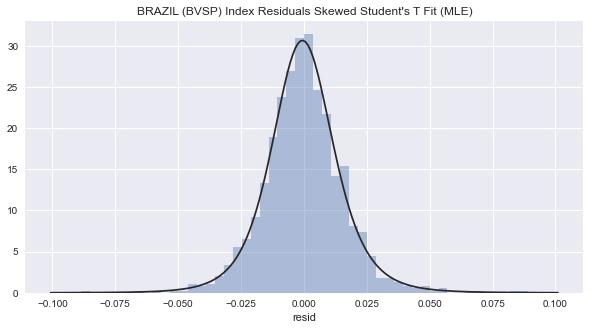

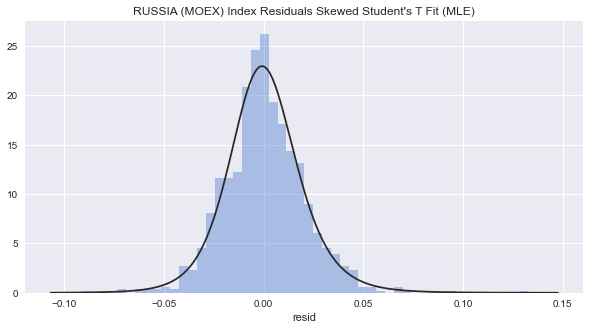

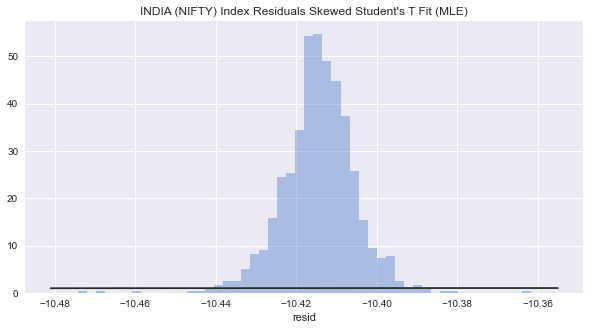

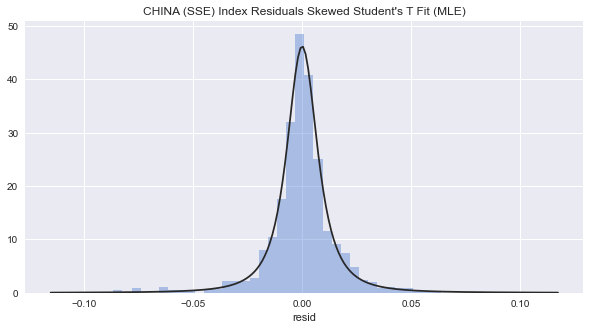

In [15]:
from scipy.stats import nct, t
for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.title(f"{res[i][0]} Index Residuals Skewed Student's T Fit (MLE)")
    sns.set_palette('muted')
    sns.distplot(res[i][1].resid, fit=nct,kde=False)
    plt.savefig(f'images/{res[i][0]}_skewed_std.png')

### IV. Estimate the covariance matrix ̂
>$$\Sigma^{*} = \frac{𝜐 − 2}v 𝑐𝑜𝑣 (𝑋) − 𝛽̂𝛽̂′ \frac{2𝜐^2}{(𝑣 − 2)^2(𝑣 − 4)}$$

In [78]:
import warnings
warnings.filterwarnings('ignore')

from copulas.multivariate import GaussianMultivariate
from copulas.univariate import StudentTUnivariate
from copulas.visualization import compare_3d

returns_copy = returns.copy()
real_data = returns_copy

# Fit a gaussian copula to the data
copula = GaussianMultivariate(distribution = StudentTUnivariate)
copula.fit(real_data)

In [79]:
parameters = copula.to_dict()
parameters.keys()

dict_keys(['covariance', 'univariates', 'columns', 'type'])

In [85]:
cov_new = pd.DataFrame(parameters['covariance'])
cov_new.columns = returns.columns
cov_new.index = returns.columns
# new correlation matrix
cov_new

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
BRAZIL (BVSP),1.000000,0.166811,0.203602,0.128604
RUSSIA (MOEX),0.166811,1.000000,0.136215,0.089542
INDIA (NIFTY),0.203602,0.136215,1.000000,0.214274
CHINA (SSE),0.128604,0.089542,0.214274,1.000000


In [87]:
# hostoric correlation matrix
returns.corr()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
BRAZIL (BVSP),1.000000,0.169845,0.190646,0.135144
RUSSIA (MOEX),0.169845,1.000000,0.130116,0.088403
INDIA (NIFTY),0.190646,0.130116,1.000000,0.224085
CHINA (SSE),0.135144,0.088403,0.224085,1.000000


### V. Draw N independent d-dimensional vectors from the multivariate Gaussian distribution

In [89]:
# Sample synthetic data
synthetic_data = copula.sample(len(real_data))

In [90]:
synthetic_data

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
0,0.003161,-0.001385,0.000777,-0.003424
1,0.013131,0.010047,0.005063,-0.006718
2,0.034414,0.055625,0.004357,-0.005309
3,0.004818,-0.027900,0.009167,-0.010987
4,0.010008,0.007627,0.010490,0.001539
...,...,...,...,...
1068,0.002514,-0.062136,0.000951,0.000378
1069,-0.001832,0.003301,-0.002457,0.002806
1070,0.012391,0.008469,0.008644,0.012164
1071,-0.005940,0.009535,0.003979,0.007401


In [91]:
returns

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
Date,,,,
2014-01-06,-0.010348,-0.032000,-0.015840,-0.024705
2014-01-08,-0.007788,0.033058,-0.002722,-0.000669
2014-01-09,-0.024814,0.001077,-0.001012,-0.008178
2014-01-10,0.007583,0.003535,0.000503,-0.007064
2014-01-13,-0.005413,-0.001532,0.016414,-0.001855
...,...,...,...,...
2018-12-20,-0.004727,-0.012071,-0.001422,-0.005215
2018-12-21,0.005019,-0.002156,-0.018052,-0.007892
2018-12-26,-0.006546,-0.024010,-0.002246,-0.007136
